The first step is to import the Pandas, Seaborn ,NumPy and Matplotlib libraries that we are going to use for data cleaning and analysis.

In [31]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Loading the data set from a CSV file

In [32]:
df= pd.read_csv("/workspaces/Predicting-Hypertension-/Hypertension-risk-model-main.csv")
df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1


# Stage method
The stage method is used to divide the patient data instances into the five stages of Hypertension diagnosis. The values denoting the start of each category are in entered to two decimal places similar to the decimal places for systolic and diastolic blood pressure in the dataset as well as to avoid unknown values. The method is used in combination with a lambda function within an apply statement 

In [33]:
def stage(sysBP, diaBP): 
    if sysBP > 180.00 or diaBP > 120.00:
        return "Hypertensive Crisis"
    elif sysBP >= 140.00 or diaBP >= 90.00:
        return "Stage 2 Hypertension"
    elif 130.00 <= sysBP <= 139.99 or 80.00 <= diaBP <= 89.99:
        return "Stage 1 Hypertension"
    elif 120.00 <= sysBP <= 129.00 and diaBP < 80.00:
        return "Elevated"
    elif sysBP < 120.00 and diaBP < 80.00:
        return "Normal"
    return "Unknown"

df["Hyp_stage"]=df[['sysBP','diaBP']].apply(lambda df: stage(df['sysBP'],df['diaBP']),axis=1)
df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk,Hyp_stage
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,Normal
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,Stage 1 Hypertension
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,Stage 1 Hypertension
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1,Stage 2 Hypertension
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,Stage 1 Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,248.0,131.0,72.0,22.00,84.0,86.0,0,Stage 1 Hypertension
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,NaN,0,Stage 1 Hypertension
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0,Stage 1 Hypertension
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1,Stage 2 Hypertension


No unknown cases

In [34]:
unknown=df['Hyp_stage']=="Unknown"
unknown.index

RangeIndex(start=0, stop=4240, step=1)

The countplot below shows the Hypertension stage distribution thus proving the dataset balanced for multi-class classification in addition to the binary classifications.

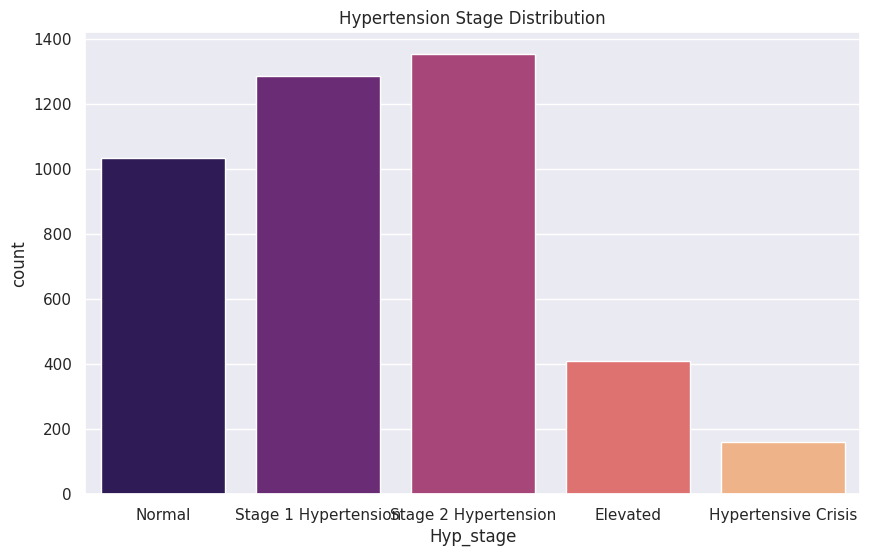

In [35]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
sns.countplot(data=df,x="Hyp_stage",hue="Hyp_stage", palette="magma");
plt.title("Hypertension Stage Distribution");


## Data Cleaning

First step of the data cleaning is to check which columns are have null values and if so ,how many? We can check for that using the Dataframe.isnull().sum() command.

In [36]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
Hyp_stage          0
dtype: int64

Next we, check that the columns are appropriate data types.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
 13  Hyp_stage      4240 non-null   object 
dtypes: float64(8), int64(5), object(1)
memory usage: 463.9+ KB


We check if there are any missing values using the Dataframe.duplicated().sum() command

In [38]:
df.duplicated().sum()

np.int64(0)

Filling in the missing values in the columns.With critical use of the Pandas library Dataframe.fillna() command. 

In [39]:
# Heart Rate column
df['heartRate']= df['heartRate'].fillna(df['heartRate'].mean())

In [40]:
#check for missing values once more
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          0
glucose          388
Risk               0
Hyp_stage          0
dtype: int64

## Body mass index column cleaning
Since the Body mass index is usually a right skewed normal distribution the best option for handling missing data in this column is replacing it with the median value.

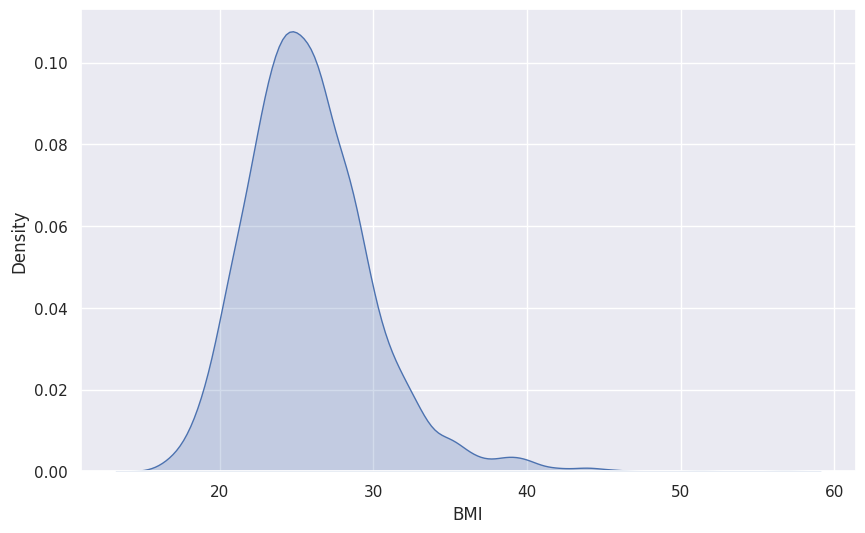

In [41]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x=df['BMI'],fill=True);

In [43]:
df['BMI']=df['BMI'].fillna(df['BMI'].median())

## Cigarettes per day column cleaning
The column is highly categorical and in this case the best missing data filler is the mode.

In [44]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0])

## Blood pressure medication column cleaning
The column is also  highly categorical and the best missing data filler is the modal value

In [45]:
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0] )

## Total cholesterol column cleaning
This is a right skewed normal distribution and to avoid distortion by the extreme values we use a median value to fill in the blanks.

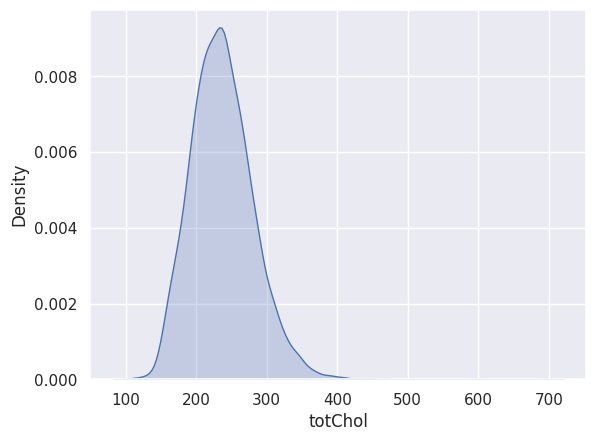

In [46]:
sns.kdeplot(data=df,x=df['totChol'],fill=True);

In [47]:
df['totChol']=df['totChol'].fillna(df['totChol'].median())


## Lastly, Glucose level column cleaning
Another right skewed normal distribution , here we need to prevent the filler data from being affected by the diabetic patients' data and use the median once value more

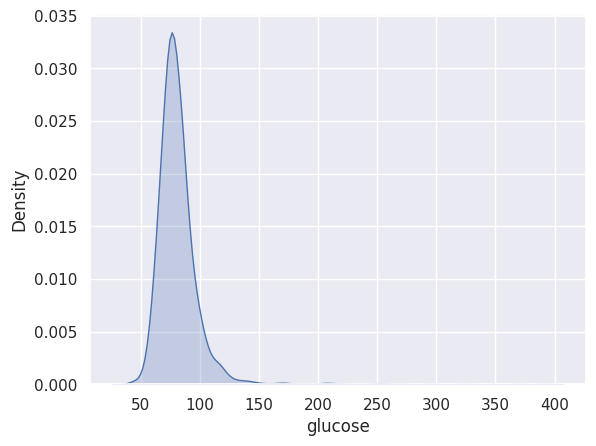

In [48]:
sns.kdeplot(data=df,x=df['glucose'],fill=True);

In [49]:
df['glucose']=df['glucose'].fillna(df['glucose'].median())


In [50]:
#check for missing values once more
df.isnull().sum()

male             0
age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Risk             0
Hyp_stage        0
dtype: int64

Save the cleaned dataframe

In [51]:
df.to_csv("Hypertension_Cleaned.csv")


In [52]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk,Hyp_stage
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,Normal
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,Stage 1 Hypertension
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,Stage 1 Hypertension
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1,Stage 2 Hypertension
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,Stage 1 Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,Stage 1 Hypertension
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,78.0,0,Stage 1 Hypertension
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0,Stage 1 Hypertension
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1,Stage 2 Hypertension


# Data Analysis
To get a general description fo the dataset we can use the DataFrame.describe() command and get the count,mean ,standard deviation, minimum, maximum and quartiles of each numerical column.

In [54]:
df[['BMI','totChol','cigsPerDay','age','sysBP','diaBP']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,4240.0,25.799005,4.070775,15.54,23.0775,25.4,28.0325,56.8
totChol,4240.0,236.667689,44.328480,107.00,206.0000,234.0,262.0000,696.0
cigsPerDay,4240.0,8.944340,11.904777,0.00,0.0000,0.0,20.0000,70.0
age,4240.0,49.580189,8.572942,32.00,42.0000,49.0,56.0000,70.0
sysBP,4240.0,132.354599,22.033300,83.50,117.0000,128.0,144.0000,295.0
diaBP,4240.0,82.897759,11.910394,48.00,75.0000,82.0,90.0000,142.5


After analyzing the distribution of the systolic blood pressure we can see that the values are skewed toward higher values which are possible hypertension cases with a peak around 120 to 139 mmHg.

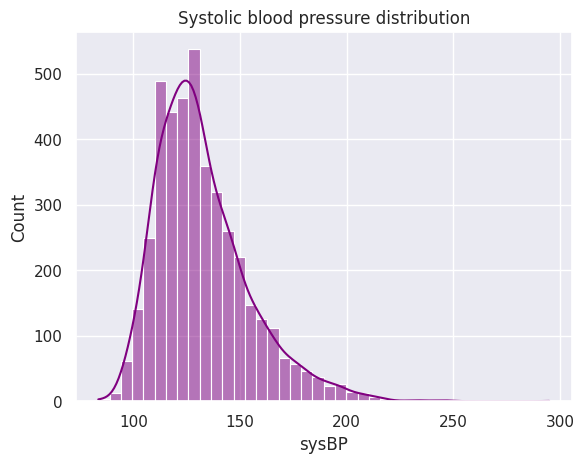

In [28]:
sns.histplot(data=df,x='sysBP',kde=True,color='purple',bins=40)
plt.title('Systolic blood pressure distribution');

Whereas the distribution of diastolic blood pressure follows a more normal distribution and there are many values above 80 mmHg which is part of the elevated hypertension stage and higher.

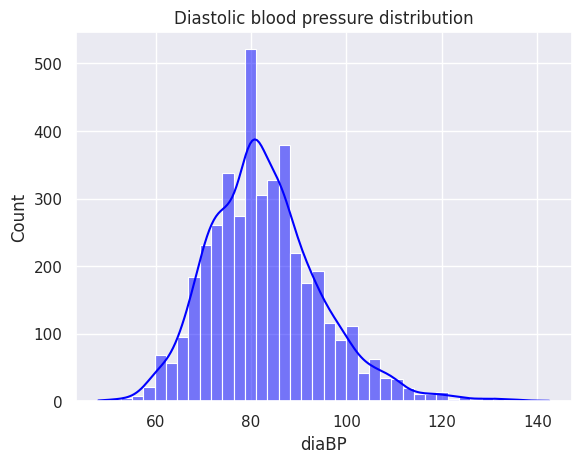

In [29]:
sns.histplot(data=df,x='diaBP',kde=True,color='blue',bins=40)
plt.title('Diastolic blood pressure distribution');

We will now analyze the data set and find any relation in the columns. The first step would be to divide the data set into the hypertensive population and non-hypertensive population.

In [55]:
non_hypert= df[df['Risk']==0]
hypert=df[df['Risk']==1]

In [79]:
hypert

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk,Hyp_stage
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1,Stage 2 Hypertension
5,0,43,0,0.0,0.0,0,228.0,180.0,110.0,30.30,77.0,99.0,1,Stage 2 Hypertension
8,1,52,0,0.0,0.0,0,260.0,141.5,89.0,26.36,76.0,79.0,1,Stage 2 Hypertension
9,1,43,1,30.0,0.0,0,225.0,162.0,107.0,23.61,93.0,88.0,1,Stage 2 Hypertension
12,1,46,1,15.0,0.0,0,294.0,142.0,94.0,26.31,98.0,64.0,1,Stage 2 Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,0,56,1,3.0,0.0,0,268.0,170.0,102.0,22.89,57.0,78.0,1,Stage 2 Hypertension
4231,1,58,0,0.0,0.0,0,187.0,141.0,81.0,24.96,80.0,81.0,1,Stage 2 Hypertension
4232,1,68,0,0.0,0.0,0,176.0,168.0,97.0,23.14,60.0,79.0,1,Stage 2 Hypertension
4233,1,50,1,1.0,0.0,0,313.0,179.0,92.0,25.97,66.0,86.0,1,Stage 2 Hypertension


In [56]:
non_hypert

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk,Hyp_stage
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,Normal
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,Stage 1 Hypertension
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,Stage 1 Hypertension
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,Stage 1 Hypertension
6,0,63,0,0.0,0.0,0,205.0,138.0,71.0,33.11,60.0,85.0,0,Stage 1 Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,1,43.0,0.0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,Stage 1 Hypertension
4235,0,48,1,20.0,0.0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,Stage 1 Hypertension
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,78.0,0,Stage 1 Hypertension
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0,Stage 1 Hypertension


Analyzing the distribution of age across the hypertensive sample from the dataset we can see that a majority of the patients are above the age of 50. Indicating that older patients are more likely to have hypertension.

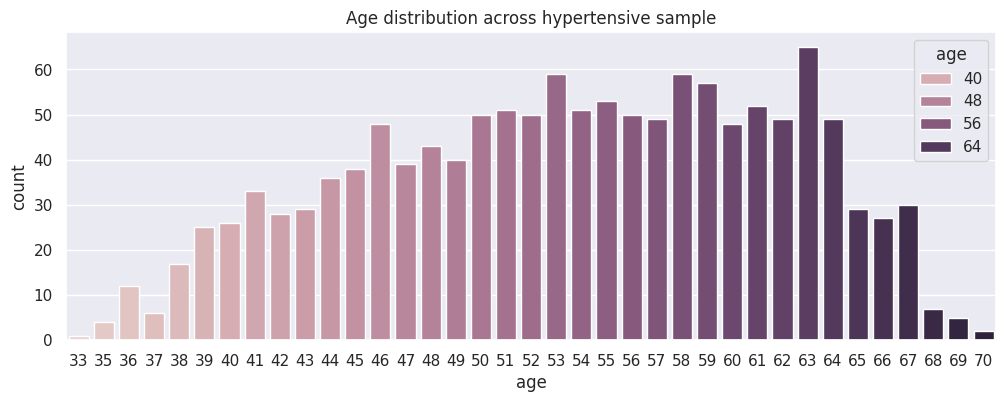

In [57]:
plt.figure(figsize=(12,4))
sns.countplot(data=hypert,x=hypert['age'],hue='age').set(title="Age distribution across hypertensive sample");

Whereas the contrary is true for the non-hypertensive sample, showing that a majority of the patients without hypertension are below the age of 50. 

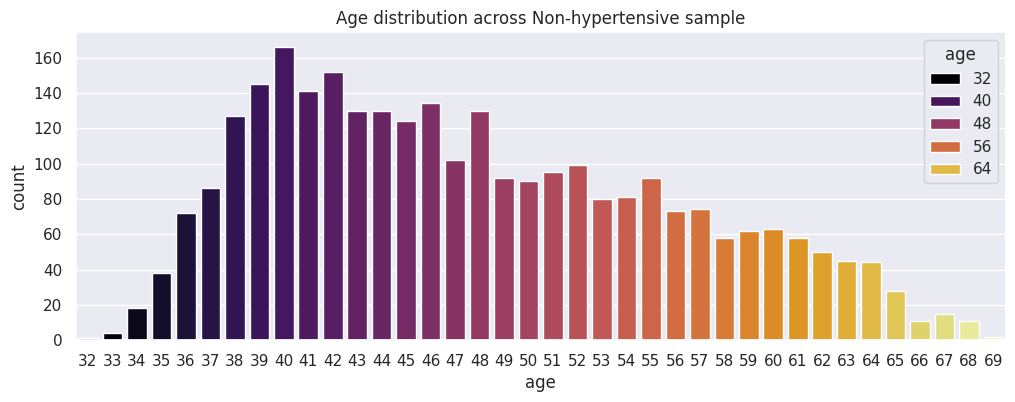

In [58]:
plt.figure(figsize=(12,4))
sns.countplot(data=non_hypert,x=non_hypert['age'],hue='age',palette='inferno').set(title='Age distribution across Non-hypertensive sample');

Now we study the difference in BMI distribution between hypertensive and non-hypertensive groups.Here the non-hypertensive samples highest density around the body mass index of 20 to 25 which is the healthy weight range and the hypertensive sample has a peak density at around 25-30 which includes overweight patients. This shows that the higher a patients BMI ,the more likely they are to have high blood pressure.

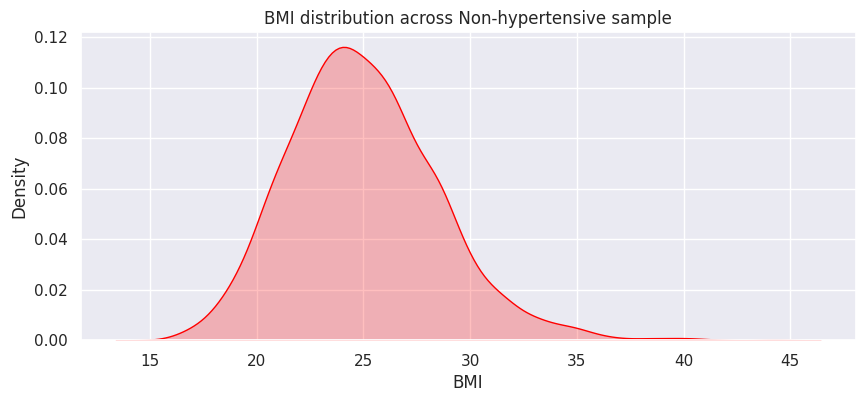

In [59]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=non_hypert,x=non_hypert['BMI'],fill=True,color='red').set(title='BMI distribution across Non-hypertensive sample');

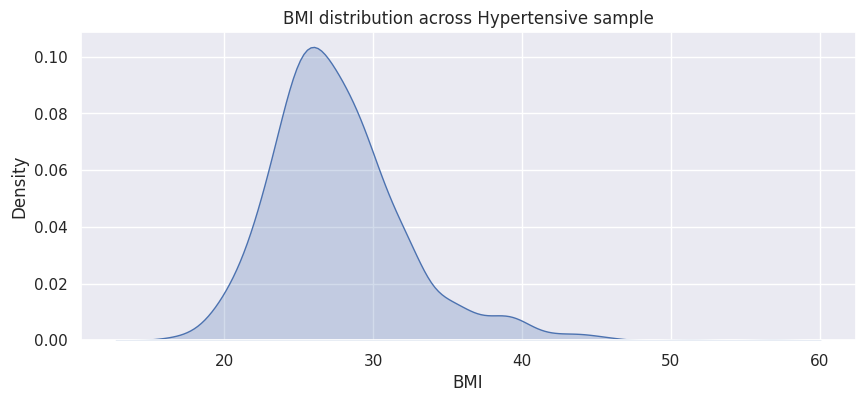

In [60]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=hypert,x=hypert['BMI'],fill=True).set(title='BMI distribution across Hypertensive sample');

Other features we can analyze are the risk factors and the extent to which they relate to the patients hypertension stage in each instance
# Blood Pressure Medication
Firstly we can take a closer look at the Blood pressure medication column and how it relates to the hypertension stage.The plot below shows that the patients with stage 2 and hypertensive crisis stages need the are the most reliant on the medication thus the model may use this feature to determine the label during application.

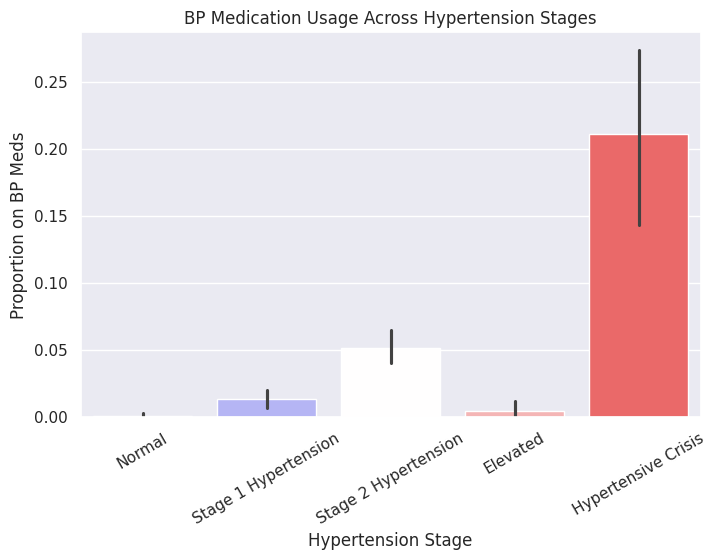

In [61]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Hyp_stage", y="BPMeds", estimator=np.mean, palette="bwr",hue="Hyp_stage");

plt.title("BP Medication Usage Across Hypertension Stages");
plt.xlabel("Hypertension Stage")
plt.ylabel("Proportion on BP Meds")
plt.xticks(rotation=30)

pd.crosstab(df["Hyp_stage"], df["BPMeds"], normalize="index") * 100;

# Total cholesterol
Total cholesterol proves to increase as the patients hypertension stages increase. With the normal stage having the least total cholesterol and hypertension crisis having the greatest total cholesterol.

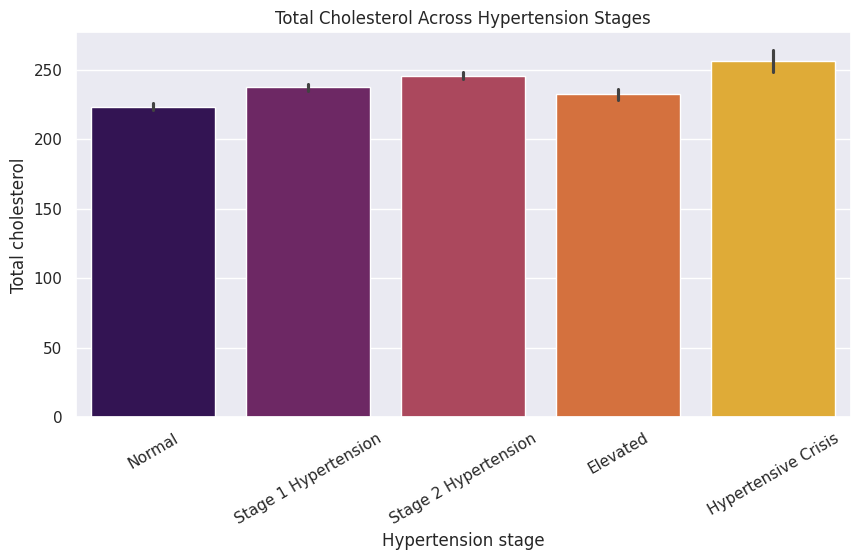

In [62]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="Hyp_stage", y="totChol", palette="inferno",hue="Hyp_stage");

plt.title("Total Cholesterol Across Hypertension Stages")

plt.xlabel("Hypertension stage")
plt.ylabel("Total cholesterol")
plt.xticks(rotation=30)

# correlation command
df["totChol"].corr(df["Hyp_stage"].astype("category").cat.codes);


# Diabetes
The analytic barplot below shows that the relation between diabetes and hypertension increases as the patient hypertension levels progress from stage 1 and upwards. This proves that most of the patients with a positive diagnosis in hypertension are also diabetics

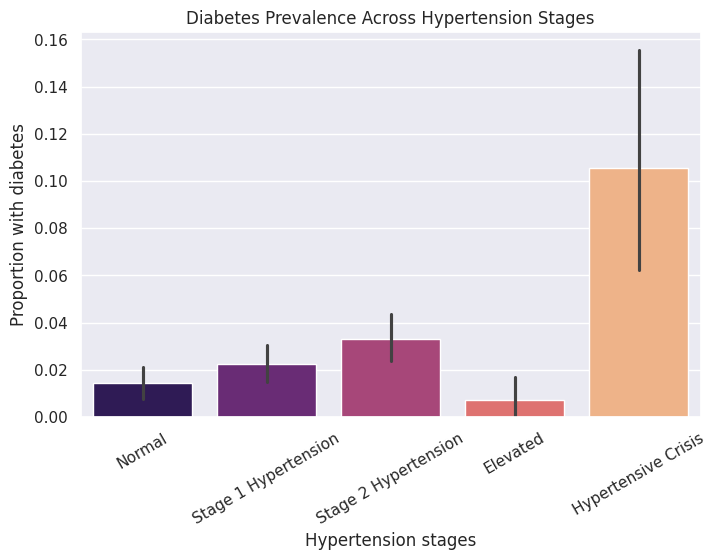

In [63]:

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Hyp_stage", y="diabetes", estimator=np.mean, palette="magma",hue="Hyp_stage");

plt.title("Diabetes Prevalence Across Hypertension Stages");
plt.xlabel("Hypertension stages")
plt.ylabel("Proportion with diabetes")

plt.xticks(rotation=30)

pd.crosstab(df["Hyp_stage"], df["diabetes"], normalize="index") * 100;


## Feature Selection and Engineering
Start by one-Hot encoding the Hypertension stage feature.

In [64]:
df=pd.get_dummies(data=df,columns=['Hyp_stage'],dtype=int)

In [65]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk,Hyp_stage_Elevated,Hyp_stage_Hypertensive Crisis,Hyp_stage_Normal,Hyp_stage_Stage 1 Hypertension,Hyp_stage_Stage 2 Hypertension
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,1,0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,0,0,1,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,0,0,1,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,0,0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,0,0,0,1,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,78.0,0,0,0,0,1,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0,0,0,0,1,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1,0,0,0,0,1


In [66]:
df.to_csv("Hypertension_Cleaned_OH_encoded.csv")

Since we are doing categorical classification we can benefit from deleting the binary hypertension risk feature

In [67]:
df=df.drop("Risk", axis =1)

In [68]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Hyp_stage_Elevated,Hyp_stage_Hypertensive Crisis,Hyp_stage_Normal,Hyp_stage_Stage 1 Hypertension,Hyp_stage_Stage 2 Hypertension
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,1,0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,0,1,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,0,1,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,0,0,0,0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,0,0,1,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,78.0,0,0,0,1,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0,0,0,1,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,0,0,0,0,1
